# Important Links

GAN for Face Generator: https://github.com/AshishJangra27/Face-Generator-with-GAN

Gender Style Transfer: https://github.com/AshishJangra27/Gender-Style-Transfer

Gender Classifier: https://github.com/AshishJangra27/Gender-Classifier

LinkedIn: https://www.linkedin.com/in/ashish-jangra/

**Assignment:**

- Load the pretrained Generator
- Load Gender Vector
- Generate 10 variations of the image from male to female as per gender vector

**Project Introduction:** In this project, I worked on generating facial images and performing controlled gender transformation using a pre-trained Generative Adversarial Network (GAN).

Key Steps:

- Loading a pre-trained GAN generator to produce realistic face images from latent vectors.
- Loading a gender vector, which represents the direction in latent space corresponding to changing gender attributes.
- Generating a base face by sampling a random latent vector.
- Applying the gender vector with gradually changing multipliers to the base latent vector to create 10 variations of the face transitioning from male to female.
- Visualizing the results by displaying the 10 images inline and optionally saving them locally.

Generator loaded. Input shape: (None, 100)
Gender vector loaded and reshaped.


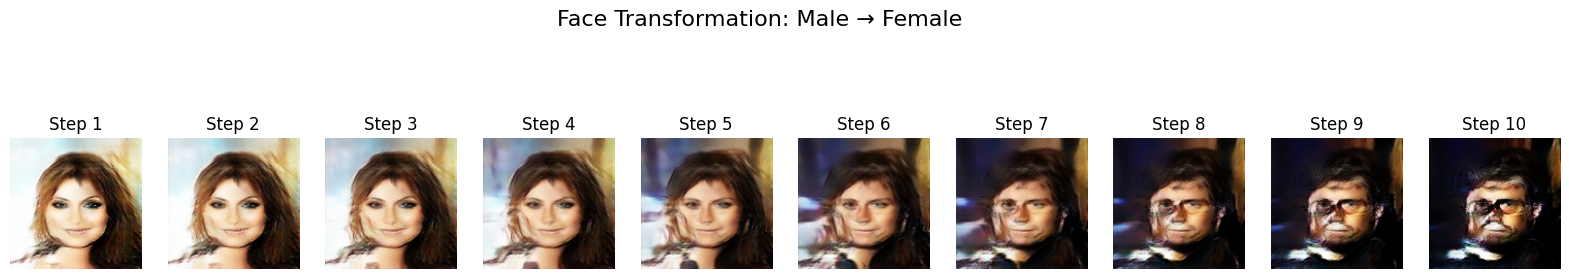

In [2]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Load pre-trained generator and gender vector
generator_path = '/content/generator_500.h5'
gender_vector_path = '/content/gender_vec.npy'

# Load Pretrained Generator
generator = tf.keras.models.load_model(generator_path)
print(f"Generator loaded. Input shape: {generator.input_shape}")

# Load Gender Vector
gender_vector = np.load(gender_vector_path).astype('float32')
gender_vector = np.reshape(gender_vector, (1, -1))
print("Gender vector loaded and reshaped.")

# Generate Latent Vector for Base Face
latent_dim = generator.input_shape[1]
base_latent = tf.random.normal(shape=(1, latent_dim))

# Generate 10 Variations (Male → Female)
num_variations = 10
strength_levels = np.linspace(-2.5, 2.5, num_variations)

generated_images = []

for strength in strength_levels:
    modified_latent = base_latent + (strength * gender_vector)
    img = generator(modified_latent, training=False)
    generated_images.append(img[0])

# Display Results
plt.figure(figsize=(20,4))
plt.suptitle("Face Transformation: Male → Female", fontsize=16)

for i, img in enumerate(generated_images):
    ax = plt.subplot(1, num_variations, i+1)
    plt.imshow((img + 1)/2.0)  # scale to [0,1]
    plt.axis('off')
    plt.title(f"Step {i+1}")
plt.show()

# Optional: Save Images
output_folder = 'outputs'
os.makedirs(output_folder, exist_ok=True)

for i, img in enumerate(generated_images):
    tf.keras.preprocessing.image.save_img(os.path.join(output_folder, f"face_{i+1}.png"), (img+1)/2.0)

**Concepts learnt:**
- Practical skills in TensorFlow/Keras, including loading pretrained models, generating images, and visualizing them.

- How to optionally use a pre-trained classifier to quantitatively validate the changes in generated images.

- Broader understanding of creative AI applications, like facial editing, style transfer, and digital art.
